>Importing the required Libraries

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>Loading the dataset into Dataframe

In [468]:
# Load dataset
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


>Information of the dataset

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [470]:
df.drop('State', axis=1, inplace=True)

>Cheching the outliers 

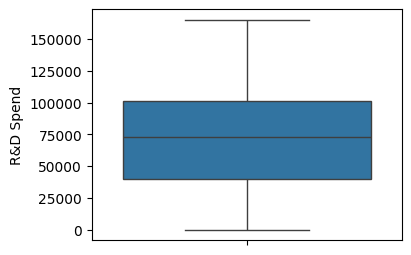

In [471]:
plt.figure(figsize=(4,3))
sns.boxplot(df["R&D Spend"])
plt.show()

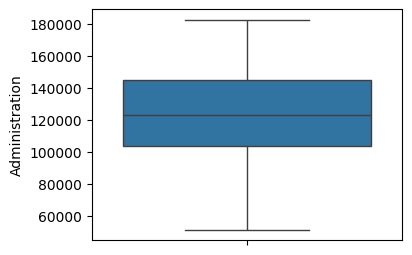

In [472]:
plt.figure(figsize=(4,3))
sns.boxplot(df["Administration"])
plt.show()

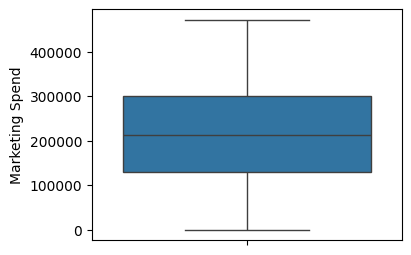

In [473]:
plt.figure(figsize=(4,3))
sns.boxplot(df["Marketing Spend"])
plt.show()

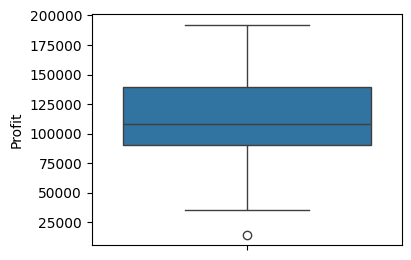

In [474]:
plt.figure(figsize=(4,3))
sns.boxplot(df["Profit"])
plt.show()

In [475]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

>creating the object to extract the methods

In [476]:
model = LinearRegression()

In [477]:
x=df.drop('Profit', axis=1)
y=df['Profit']

>Splitting the model to training and testing

In [478]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)

>Training the model

In [479]:
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


>Slope of all the columns

In [480]:
model.coef_

array([ 0.80377928, -0.06792917,  0.03124155])

>Intercept of all the Columns (base value)

In [481]:
model.intercept_

np.float64(54071.87574599086)

>Predicting the model

- ytrain

In [482]:
predicted_ytrain=model.predict(xtrain)
predicted_ytrain

array([128674.21481375, 173526.31060596,  92166.27056176, 150594.38062418,
       174025.89464521, 156263.96591425,  75875.61337896,  56544.2307896 ,
        44872.43693282, 145972.6134789 , 155351.5072822 , 116775.75522568,
       113645.92925412,  87261.81601271,  95595.18956453, 192416.0460853 ,
        62267.25077311, 114378.74518627,  98381.67577632, 164627.81392974,
        99756.02812236, 136557.05633416,  74763.90137685, 188349.65891895,
       115998.26137911, 183278.75349458,  58992.22815508,  91700.47784312,
       110690.98993962,  74529.6788822 , 135634.27316125, 114682.80137716,
       129275.82528706,  47536.53906777, 116958.97621351, 159035.48368854,
        71163.66669418, 147859.48954075,  98446.88903303,  71640.18065537])

- ytest

In [483]:
predicted_ytest=model.predict(xtest)
predicted_ytest

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

>Checking the Score

In [484]:
model.score(xtrain,ytrain)  #training is 95%

0.9535927757257411

In [485]:
model.score(xtest,ytest)  #testing is 90%

0.900065308303732

# GOODFIT 
(both training and testing score are performing good on the model)

>Using StandardScaler

In [486]:
from sklearn.preprocessing import StandardScaler

In [487]:
scaler = StandardScaler()

>Standardizing the values for xtrain

fit_transform returns mean and standarddevation

In [488]:
xtrain_scaled=scaler.fit_transform(xtrain)
xtrain_scaled

array([[ 0.34202149,  0.22787678,  0.12425038],
       [ 1.36207849, -1.0974737 ,  1.14990688],
       [-0.71081297, -2.5770186 , -0.34136825],
       [ 0.90611438,  1.0172367 ,  0.66890185],
       [ 1.40997088, -0.09115403,  1.30006861],
       [ 1.20367103,  0.96116332, -0.95248784],
       [-1.05285826, -1.34392538, -0.62843389],
       [-1.61480906, -0.19649414,  0.54106768],
       [-1.642623  ,  0.52691442, -2.07854935],
       [ 0.77885123,  0.05437051,  0.2294954 ],
       [ 0.96515572, -0.45976843,  0.61043134],
       [ 0.00687736,  0.01677049,  0.25215324],
       [-0.01361318, -0.80643974, -0.83912073],
       [-0.66099544,  1.34830937, -0.2199755 ],
       [-0.34996231,  1.16416226, -1.30074144],
       [ 1.85350175,  0.58117289,  2.08110569],
       [-1.17369938,  1.24178366, -1.82872605],
       [-0.11798808,  0.24795036,  1.03542337],
       [-0.46926521, -0.66714345, -0.18614397],
       [ 1.14576723, -0.78676456,  1.12074899],
       [-0.25546817,  1.17634061, -1.133

>Standardizing the values for xtest

In [489]:
xtest_scaled=scaler.transform(xtest)
xtest_scaled

array([[ 0.30245367,  0.52942836,  0.14916233],
       [-0.82734624, -1.40769369, -0.53560477],
       [-0.33181874, -0.20294703, -1.27505783],
       [-1.62147425,  0.11103854, -2.06176266],
       [ 0.35879726,  0.88291223,  0.41286919],
       [-1.63116196, -2.56004955, -2.07854935],
       [-0.04987791,  0.84817808, -0.89664846],
       [-0.2753597 ,  0.67912498, -0.86215204],
       [-0.30191325,  0.29793642, -1.67222209],
       [ 0.18462534,  1.19412269, -2.07854935]])

In [490]:
scaler.mean_

array([ 77687.8455 , 121142.92275, 235747.081  ])

In [491]:
scaler.scale_

array([ 47294.99429799,  27108.76158002, 113419.04441256])

>Now again training the model with standaraized values

In [492]:
model = LinearRegression()

In [493]:
model.fit(xtrain_scaled,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [494]:
model.coef_

array([38014.73625775, -1841.47578233,  3543.38628169])

In [495]:
model.score(xtrain_scaled,ytrain)  #training is 95%

0.9535927757257411

In [496]:
model.score(xtest_scaled,ytest)  #training is 90%

0.900065308303732

- SINCE TRAIN AND TEST PERFORMANCE IS ABOVE AVERAGE - IT IS GOODFIT

# MODEL EVALUATION 

In [497]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [498]:
r2_score(ytrain,predicted_ytrain)

0.9535927757257411

In [499]:
r2_score(ytest,predicted_ytest)

0.900065308303732

In [500]:
RMSE = root_mean_squared_error(ytest,predicted_ytest)
RMSE    

8995.90580336142

In [501]:
mse_evaluation = RMSE/ytest.mean()
mse_evaluation

np.float64(0.09230705979051723)

> by seeing this we can say model performance is very good because mse_evaluation is >.10 [LOW MSE]

> SLOPE COMPARISION

Slope before Standardizing the values -  array([ 0.80377928, -0.06792917,  0.03124155])    

Slope after Stanadarscaler - array([38014.73625775, -1841.47578233,  3543.38628169])